# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on our Boston Housing Data set!

## Objectives
You will be able to:
* Run linear regression on Boston Housing dataset with all the predictors
* Interpret the parameters of the multiple linear regression model

## The Boston Housing Data

We pre-processed the Boston Housing Data again. This time, however, we did things slightly different:
- We dropped "ZN" and "NOX" completely
- We categorized "RAD" in 3 bins and "TAX" in 4 bins
- We used min-max-scaling on "B", "CRIM" and "DIS" (and logtransformed all of them first, except "B")
- We used standardization on "AGE", "INDUS", "LSTAT" and "PTRATIO" (and logtransformed all of them first, except for "AGE") 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features = boston_features.drop(["NOX","ZN"],axis=1)

# first, create bins based on the values observed. 3 values will result in 2 bins
bins = [0,6,24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins based on the values observed. 4 values will result in 3 bins
bins = [0, 270, 360, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

In [2]:
age = boston_features["AGE"]
b = boston_features["B"]
logcrim = np.log(boston_features["CRIM"])
logdis = np.log(boston_features["DIS"])
logindus = np.log(boston_features["INDUS"])
loglstat = np.log(boston_features["LSTAT"])
logptratio = np.log(boston_features["PTRATIO"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["CRIM"] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["AGE"] = (age-np.mean(age))/np.sqrt(np.var(age))
boston_features["INDUS"] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))
boston_features["PTRATIO"] = (logptratio-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))

In [3]:
boston_features.head()

,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 6]","RAD_(6, 24]","TAX_(0, 270]","TAX_(270, 360]","TAX_(360, 712]"
0,0.000000,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-1.275260,1,0,0,1,0
1,0.153211,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.263711,1,0,1,0,0
2,0.153134,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-1.627858,1,0,1,0,0
3,0.171005,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-2.153192,1,0,1,0,0
4,0.250315,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-1.162114,1,0,1,0,0


## Run an linear model in Statsmodels

In [4]:
# Extract the dependent variable (median house price per town) from the dataset object
outcome = boston.target

In [5]:
# Import statsmodels
import statsmodels.api as sm

In [6]:
# Prep the predictors by adding a constant
predictors_plus_int = sm.add_constant(boston_features)

# Fit the model
model = sm.OLS(outcome, predictors_plus_int).fit()

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 21 Aug 2019   Prob (F-statistic):          5.08e-153
Time:                        13:16:44   Log-Likelihood:                -1458.2
No. Observations:                 506   AIC:                             2942.
Df Residuals:                     493   BIC:                             2997.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4607      1.789      2.493      0.013       0.946       7.976
CRIM              -1.9538      2.115     -0.924      0.356      -6.110       2.202
INDUS             -0.8046      0.362     -2.220      0.027      -1.517      -0.093
CHAS               2.5959      0.796      3.260      0.001       1.032       4.160
RM                 2.6466      0.408      6.488      0.000       1.845       3.448
AGE                0.0794      0.352      0.226      0.821      -0.612       0.770
DIS              -10.0962      1.856     -5.439      0.000     -13.743      -6.449
PTRATIO           -1.4867      0.241     -6.160      0.000      -1.961      -1.013
B                  3.8412      0.986      3.897      0.000       1.905       5.778
LSTAT             -5.6288      0.354    -15.912      0.000      -6.324      -4.934
RAD_(0, 6]         1.5613      0.821      1.901      0.058      -0.052       3.175
RAD_(6, 24]        2.8993      1.073      2.701      0.007       0.791       5.008
TAX_(0, 270]       2.6222      0.716      3.665      0.000       1.216       4.028
TAX_(270, 360]     1.3624      0.704      1.936      0.053      -0.020       2.745
TAX_(360, 712]     0.4761      0.684      0.696      0.487      -0.868       1.820
==============================================================================
Omnibus:                      106.730   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.101
Skew:                           0.891   Prob(JB):                     1.48e-94
Kurtosis:                       7.162   Cond. No.                     5.67e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Run the same model in Scikit-learn

In [7]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression object
linreg = LinearRegression()

# Fit the model
linreg.fit(boston_features, outcome)

# Print the coefficients
print(linreg.coef_)

# Print the intercept
print(linreg.intercept_)

[ -1.95380233  -0.80457549   2.59586776   2.64657111   0.07939727
 -10.09618465  -1.48666599   3.8412139   -5.62879369  -0.66898159
   0.66898159   1.13527933  -0.12449679  -1.01078255]
8.177858391539033


## Remove the necessary variables to make sure the coefficients are the same for Scikit-learn vs Statsmodels

In [8]:
# Initialize new list of predictors minus one level of each categorical variable
new_predictors = boston_features.drop(['RAD_(6, 24]','TAX_(360, 712]'], axis=1)

### Statsmodels

In [9]:
# Add constant to new_predictors
new_pred_plus_const = sm.add_constant(new_predictors)

# Fit model and print summary
model = sm.OLS(outcome, new_pred_plus_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 21 Aug 2019   Prob (F-statistic):          5.08e-153
Time:                        13:16:47   Log-Likelihood:                -1458.2
No. Observations:                 506   AIC:                             2942.
Df Residuals:                     493   BIC:                             2997.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.8361      3.416      2.294      0.022       1.125      14.547
CRIM              -1.9538      2.115     -0.924      0.356      -6.110       2.202
INDUS             -0.8046      0.362     -2.220      0.027      -1.517      -0.093
CHAS               2.5959      0.796      3.260      0.001       1.032       4.160
RM                 2.6466      0.408      6.488      0.000       1.845       3.448
AGE                0.0794      0.352      0.226      0.821      -0.612       0.770
DIS              -10.0962      1.856     -5.439      0.000     -13.743      -6.449
PTRATIO           -1.4867      0.241     -6.160      0.000      -1.961      -1.013
B                  3.8412      0.986      3.897      0.000       1.905       5.778
LSTAT             -5.6288      0.354    -15.912      0.000      -6.324      -4.934
RAD_(0, 6]        -1.3380      0.672     -1.990      0.047      -2.659      -0.017
TAX_(0, 270]       2.1461      0.704      3.047      0.002       0.762       3.530
TAX_(270, 360]     0.8863      0.607      1.459      0.145      -0.307       2.080
==============================================================================
Omnibus:                      106.730   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.101
Skew:                           0.891   Prob(JB):                     1.48e-94
Kurtosis:                       7.162   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scikit-learn

In [10]:
# Fit the model and print coefficients
linreg.fit(new_predictors, outcome)
print(linreg.coef_)
print(linreg.intercept_)

[ -1.95380233  -0.80457549   2.59586776   2.64657111   0.07939727
 -10.09618465  -1.48666599   3.8412139   -5.62879369  -1.33796317
   2.14606188   0.88628576]
7.836057432092941


## Interpret the coefficients for PTRATIO, PTRATIO, LSTAT

- CRIM: per capita crime rate by town
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

Interpretation: 
- For every unit that PTRATIO increases (i.e., for every unit that class size increases), median home value decreases by 1.5 units.
- The meaning LSTAT is not really clear in the documentation; it seems to mean "percentage of the population that could be considered lower class" (as opposed to middle class or upper class). For every unit increase in LSTAT (i.e., for every unit decrease in the class status of the population), median home value decreases by 5.6 units. 
- The only feature that has a bigger effect than LSTAT is DIS (weighted distances from employment centers). For every unit increase in distance from employment centers, the median home value decreases by 10.1 units.

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- CRIM: 0.15
- INDUS: 6.07
- CHAS: 1        
- RM:  6.1
- AGE: 33.2
- DIS: 7.6
- PTRATIO: 17
- B: 383
- LSTAT: 10.87
- RAD: 8
- TAX: 284

In [11]:
coefs = linreg.coef_
intercept = linreg.intercept_

In [12]:
# Get new copies of the features for use in transforming the supplied values
boston_raw = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_raw = boston_raw.drop(["NOX","ZN"],axis=1)
boston_raw.head()

,CRIM,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.0,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.0,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.0,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.0,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.0,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
# Transform the supplied values
CRIM = np.log(0.15)
crim = (CRIM - min(boston_raw['CRIM'])) / (max(boston_raw['CRIM']) - min(boston_raw['CRIM']))

INDUS = np.log(6.07)
indus = (INDUS - np.mean(boston_raw['INDUS'])) / np.sqrt(np.var(boston_raw['INDUS']))

chas = 1

rm =  6.1

AGE = 33.2
age = (AGE - np.mean(boston_raw['AGE'])) / np.sqrt(np.var(boston_raw['AGE']))

DIS = np.log(7.6)
dis = (DIS - min(boston_raw['DIS'])) / (max(boston_raw['DIS']) - min(boston_raw['DIS']))

PTRATIO = np.log(17)
ptratio = (PTRATIO - np.mean(boston_raw['PTRATIO'])) / np.sqrt(np.var(boston_raw['PTRATIO']))

B = 383
b = (B - min(boston_raw['B'])) / (max(boston_raw['B']) - min(boston_raw['B']))

LSTAT = np.log(10.87)
lstat = (LSTAT - np.mean(boston_raw['LSTAT'])) / np.sqrt(np.var(boston_raw['LSTAT']))

# rad = 8 is going to be multiplied by 0 anyway
rad = 1
# Tax rate of 284 is just going to a '1' in the column for the appropriate bin
tax = 1



In [14]:
# Use our model coefficients to predict the price of a house with the given feature values
house_price = (coefs[0]*crim + coefs[1]*indus + coefs[2]*chas
               + coefs[3]*rm + coefs[4]*age + coefs[5]*dis
               + coefs[6]*ptratio + coefs[7]*b + coefs[8]*lstat
               + 0*rad + coefs[11]*tax)
print('The predicted price of such a house is $' + str(round(house_price*1000, 2)) + '.')

The predicted price of such a house is $42384.74.


/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


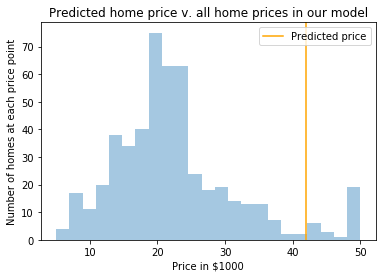

In [15]:
# Show where this house falls in the distribution of house prices
# Import needed packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create the plot
sns.distplot(outcome, kde=False)
plt.axvline(x=42, color='orange', label="Predicted price")
plt.legend()
plt.title('Predicted home price v. all home prices in our model')
plt.xlabel('Price in $1000')
plt.ylabel('Number of homes at each price point')
plt.show();

## Summary
Congratulations! You've fitted your first multiple linear regression model on the Boston Housing Data.